Generacion 0





Ciudades generadas:  [(1, 9), (9, 21), (14, 13), (17, 19), (5, 15)]
Diatancias entre las ciudades generadas:  {'01': 14.422205101855956, '02': 13.601470508735444, '03': 18.867962264113206, '04': 7.211102550927978, '12': 9.433981132056603, '13': 8.246211251235321, '14': 7.211102550927978, '23': 6.708203932499369, '24': 9.219544457292887, '34': 12.649110640673518}
El camino es: [0, 1, 2, 3, 4] y el fitness es: 50.42460335801342
El camino es: [0, 2, 4, 3, 1] y el fitness es: 58.13854195979313
El camino es: [0, 1, 4, 2, 3] y el fitness es: 56.4290183066894
El camino es: [0, 3, 4, 1, 2] y el fitness es: 61.763627096506745
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Generación #: 1
El camino es: [0, 1, 2, 3, 4] y el fitness es: 50.42460335801342
El camino es: [0, 1, 4, 2, 3] y el fitness es: 56.4290183066894
El camino e

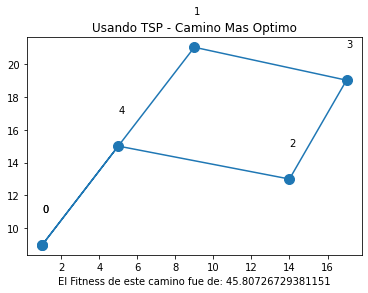

In [3]:
import math
import random
import matplotlib.pyplot as plt


poblacion = 4
numero_ciudades = 5
punto_inicial = 0
generaciones = 10
probabilidad = 0.5

# Esta función realiza un DataSet de las posiciones X y Y de las n ciudades
# y devuelve una lista con los puntos por cada ciudad.
def crearDataset(n):
    puntos = 0
    lista = list()
    while puntos < n:
        x = random.randint(0, numero_ciudades**2)
        y = random.randint(0, numero_ciudades**2)
        print()
        if (x, y) not in lista:
            lista.append((x, y))
            puntos += 1
    return lista

# Esta función toma las coordenadas de dos ciudades y devuelve
# la distancia entre ellas utilizando la fórmula euclidiana.
def formula_distancia(x1, x2, y1, y2):
  return math.sqrt((x2-x1)**2+(y2-y1)**2)


#Esta función toma la lista de ciudades y devuelve un diccionario
#que contiene las distancias entre cada par de ciudades.
def distancias(lista):
    dict_distancias = dict()
    for i in range(len(lista) - 1):
        for j in range(i + 1, len(lista)):
            dict_distancias[str(i)+str(j)] = formula_distancia(lista[i][0],lista[j][0],lista[i][1],lista[j][1])
    return dict_distancias

# Esta función toma el último nodo del camino hijo, el nodo padre y
# el diccionario de distancias y devuelve la distancia entre el último nodo y el nodo padre.
def distancia_padre_hijo(ultimo, padre, distancias):

    if(str(ultimo)+str(padre) in keys):
        distancia = distancias.get(str(ultimo)+str(padre))
    else:
        distancia = distancias.get(str(padre) + str(ultimo))
    return distancia

# Funcion para generar los caminos dado un nodo unicial , una poblacion p y n ciudades
def generarcaminos(n, p, inical):
    caminos=list()
    while len(caminos) < p:
        temp= list()
        temp.append(inical)
        while len(temp) < n:
            rand = random.randint(0, n-1)
            if rand not in temp:
                temp.append(rand)
        if temp not in caminos:
            caminos.append(temp)
    return caminos

#calculamos el fitness de un camino
def fitness(camino,distancias):
    suma=0
    for i in range(len(camino)-1):
        if (str(camino[i])+str(camino[i+1]) in keys):
            suma+= distancias[str(camino[i])+str(camino[i+1])]
        else:
            suma+= distancias[str(camino[i+1])+str(camino[i])]
    suma+=distancias[str(punto_inicial)+str(camino[len(camino)-1])]
    return suma

# Esta función saca la ciudad mas proxima a agregar para el hijo mientras se esta realizando el cruce entre padres.
def minino(temp,hijo,papa):
    if(len(temp)!=0):
        temp = set(temp)
        temp = list(temp)
        lista_distancias_h_p = list()
        for items in temp:
            lista_distancias_h_p.append(distancia_padre_hijo(hijo[-1], items, distancias_ciudades))
        hijo.append(temp[lista_distancias_h_p.index(min(lista_distancias_h_p))])
    else:

        hijo.extend([elemento for elemento in papa if elemento not in hijo])

    return hijo


# En esta función realizamos el cruce entre los padres para que nos devuelva un hijo.
def cruce(papa, mama):
    hijo = list()
    hijo.append(punto_inicial)

    for i in range(len(papa)):
        temp = list()
        if (i==0):
            temp.append(papa[-1])
            temp.append(papa[1])
            temp.append(mama[-1])
            temp.append(mama[1])
        elif i == len(papa)-1:
            temp.append(papa[0])
            temp.append(papa[-2])
            temp.append(mama[0])
            temp.append(mama[-2])
        else:
            temp.append(papa[i+1])
            temp.append(papa[i-1])
            temp.append(mama[i + 1])
            temp.append(mama[i - 1])

        temp = [elemento for elemento in temp if elemento not in hijo]
        if (len(hijo)<len(papa)):
            hijo = minino(temp, hijo, papa)

    return hijo


# En esta función realizamos la mutacion de un individuo de acuerdo a una probabilidad.
# Generamos un valor entre 0 y 1 y si ese valor es menor a la probabilidad se realiza la mutación.
def mutacion(individuo):
    if (random.random() < probabilidad):
        print(f'Hubo una mutación de {individuo}')
        a = random.randint(1, len(individuo)-2)
        b = random.randint(1, len(individuo)-2)
        while a == b:
            b = random.randint(1, len(individuo)-2)
        individuo[a], individuo[b] = individuo[b], individuo[a]
        print(f'La mutación quedo: {caminos[ran]}')
    return individuo


# Aquí creamos la generacion base para con esto realizar las demas generaciones
print('Generacion 0')
ciudades = crearDataset(numero_ciudades)
print('Ciudades generadas: ',ciudades)
distancias_ciudades = distancias(ciudades)
print('Diatancias entre las ciudades generadas: ',distancias_ciudades)
caminos = generarcaminos(numero_ciudades, poblacion, punto_inicial)
keys = [key for key in distancias_ciudades]

lista_fitness = list()
lista_fitness = [fitness(camino, distancias_ciudades) for camino in caminos]

dic = zip(caminos, lista_fitness)
for camino, fit in dic:
    print(f'El camino es: {camino} y el fitness es: {fit}')

print('-'*200)

# En este bucle realizamos las diferentes generaciones con la población.
for i in range(1, generaciones):
    
    # Con este if controlamos si los fitness de las generaciones tienden a tener valores parecidos.
    if lista_fitness[0] == lista_fitness[1] == lista_fitness[2] == lista_fitness[3]:
        break


    parejas = list(zip(lista_fitness, caminos))
    # Ordenamos las tuplas en función de los elementos numéricos
    parejas_ordenadas = sorted(parejas)

    # Desempaquetamos las tuplas ordenadas en dos listas separadas
    lista_fitness, caminos = zip(*parejas_ordenadas)

    lista_fitness = list(lista_fitness)
    caminos = list(caminos)
    lista_fitness.pop()
    caminos.pop()


    caminos.append(cruce(caminos[0], caminos[1]))
    caminos.append(cruce(caminos[1], caminos[2]))
    ran=random.randint(0,len(caminos)-1)
    caminos[ran]=mutacion(caminos[ran])


    lista_fitness = list()
    lista_fitness = [fitness(camino, distancias_ciudades) for camino in caminos]

    dic = zip(caminos, lista_fitness)

    print(f'Generación #: {i}')
    for camino, fit in dic:
        print(f'El camino es: {camino} y el fitness es: {fit}')
    print('-'*200)
print('-'*200)
print(f'Como las generaciones ya estan dando caminos con valores de fitness muy parecidos, entonces tomamos como mejor solucion la siguiente:\n Camino: {caminos[0]} y fitness: {lista_fitness[0]}')

# Aquí graficamos la mejor solucion posible encontrada por el algoritmo
def graficar_ruta(ciudades, camino, lista):
    # Agregar la primera ciudad al final del camino para cerrar el circuito
    camino += [camino[0]]

    # Obtener las coordenadas X e Y de las ciudades
    x = [ciudades[i][0] for i in camino]
    y = [ciudades[i][1] for i in camino]

    # Graficar las ciudades y la ruta
    plt.plot(x, y, 'o-', markersize=10)

    # Agregar etiquetas a los puntos
    for i, ciudad in enumerate(camino):
        plt.text(x[i], y[i] + 2, str(ciudad))

    # Configurar los ejes y el título
    plt.title('Usando TSP - Camino Mas Optimo')
    plt.xlabel(f'El Fitness de este camino fue de: {lista}')

    # Mostrar la gráfica
    plt.show()

graficar_ruta(ciudades,caminos[0],lista_fitness[0])

